In [17]:
import numpy as np
import pandas as pd
import plotly

In [18]:
help(plotly)

Help on package plotly:

NAME
    plotly - https://plot.ly/python/

DESCRIPTION
    Plotly's Python API allows users to programmatically access Plotly's
    server resources.
    
    This package is organized as follows:
    
    Subpackages:
    
    - plotly: all functionality that requires access to Plotly's servers
    
    - graph_objs: objects for designing figures and visualizing data
    
    - matplotlylib: tools to convert matplotlib figures
    
    Modules:
    
    - tools: some helpful tools that do not require access to Plotly's servers
    
    - utils: functions that you probably won't need, but that subpackages use
    
    - version: holds the current API version
    
    - exceptions: defines our custom exception classes

PACKAGE CONTENTS
    _subplots
    _version
    _widget_version
    animation
    basedatatypes
    basewidget
    callbacks
    colors (package)
    config
    conftest
    dashboard_objs
    data (package)
    exceptions
    express (package)
  

In [19]:
df = pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [20]:
df["default"].replace("yes", 1, inplace=True)
df["default"].replace("no", 0, inplace=True)
df["default"].value_counts()

default
0    10994
1      168
Name: count, dtype: int64

In [21]:
df["housing"].replace("yes", 1, inplace=True)
df["housing"].replace("no", 0, inplace=True)
df["housing"].value_counts()

housing
0    5881
1    5281
Name: count, dtype: int64

In [22]:
df["loan"].replace("yes", 1, inplace=True)
df["loan"].replace("no", 0, inplace=True)
df["loan"].value_counts()

loan
0    9702
1    1460
Name: count, dtype: int64

In [25]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df["job"] = label_encoder.fit_transform(df["job"])
df["marital"] = label_encoder.fit_transform(df["marital"])
df["education"] = label_encoder.fit_transform(df["education"])
df["month"] = label_encoder.fit_transform(df["month"])
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,unknown,5,8,1042,1,-1,0,unknown,yes
1,56,0,1,1,0,45,0,0,unknown,5,8,1467,1,-1,0,unknown,yes
2,41,9,1,1,0,1270,1,0,unknown,5,8,1389,1,-1,0,unknown,yes
3,55,7,1,1,0,2476,1,0,unknown,5,8,579,1,-1,0,unknown,yes
4,54,0,1,2,0,184,0,0,unknown,5,8,673,2,-1,0,unknown,yes
5,42,4,2,2,0,0,1,1,unknown,5,8,562,2,-1,0,unknown,yes
6,56,4,1,2,0,830,1,1,unknown,6,8,1201,1,-1,0,unknown,yes
7,60,5,0,1,0,545,1,0,unknown,6,8,1030,1,-1,0,unknown,yes
8,37,9,1,1,0,1,1,0,unknown,6,8,608,1,-1,0,unknown,yes
9,28,7,2,1,0,5090,1,0,unknown,6,8,1297,3,-1,0,unknown,yes


In [26]:
df["deposit"].replace("yes", 1, inplace=True)
df["deposit"].replace("no", 0, inplace=True)
df["deposit"].value_counts()

deposit
0    5873
1    5289
Name: count, dtype: int64

In [27]:
df["contact"].replace("unknown", np.nan, inplace=True)
df["contact"].value_counts()

contact
cellular     8042
telephone     774
Name: count, dtype: int64

In [29]:
df["contact"].isna().sum()

2346

In [30]:
df["poutcome"].replace("unknown", np.nan, inplace=True)
df["poutcome"].isna().sum()

8326

In [31]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,NaN,5,8,1042,1,-1,0,NaN,1
1,56,0,1,1,0,45,0,0,NaN,5,8,1467,1,-1,0,NaN,1
2,41,9,1,1,0,1270,1,0,NaN,5,8,1389,1,-1,0,NaN,1
3,55,7,1,1,0,2476,1,0,NaN,5,8,579,1,-1,0,NaN,1
4,54,0,1,2,0,184,0,0,NaN,5,8,673,2,-1,0,NaN,1
5,42,4,2,2,0,0,1,1,NaN,5,8,562,2,-1,0,NaN,1
6,56,4,1,2,0,830,1,1,NaN,6,8,1201,1,-1,0,NaN,1
7,60,5,0,1,0,545,1,0,NaN,6,8,1030,1,-1,0,NaN,1
8,37,9,1,1,0,1,1,0,NaN,6,8,608,1,-1,0,NaN,1
9,28,7,2,1,0,5090,1,0,NaN,6,8,1297,3,-1,0,NaN,1


C:\Users\ALI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



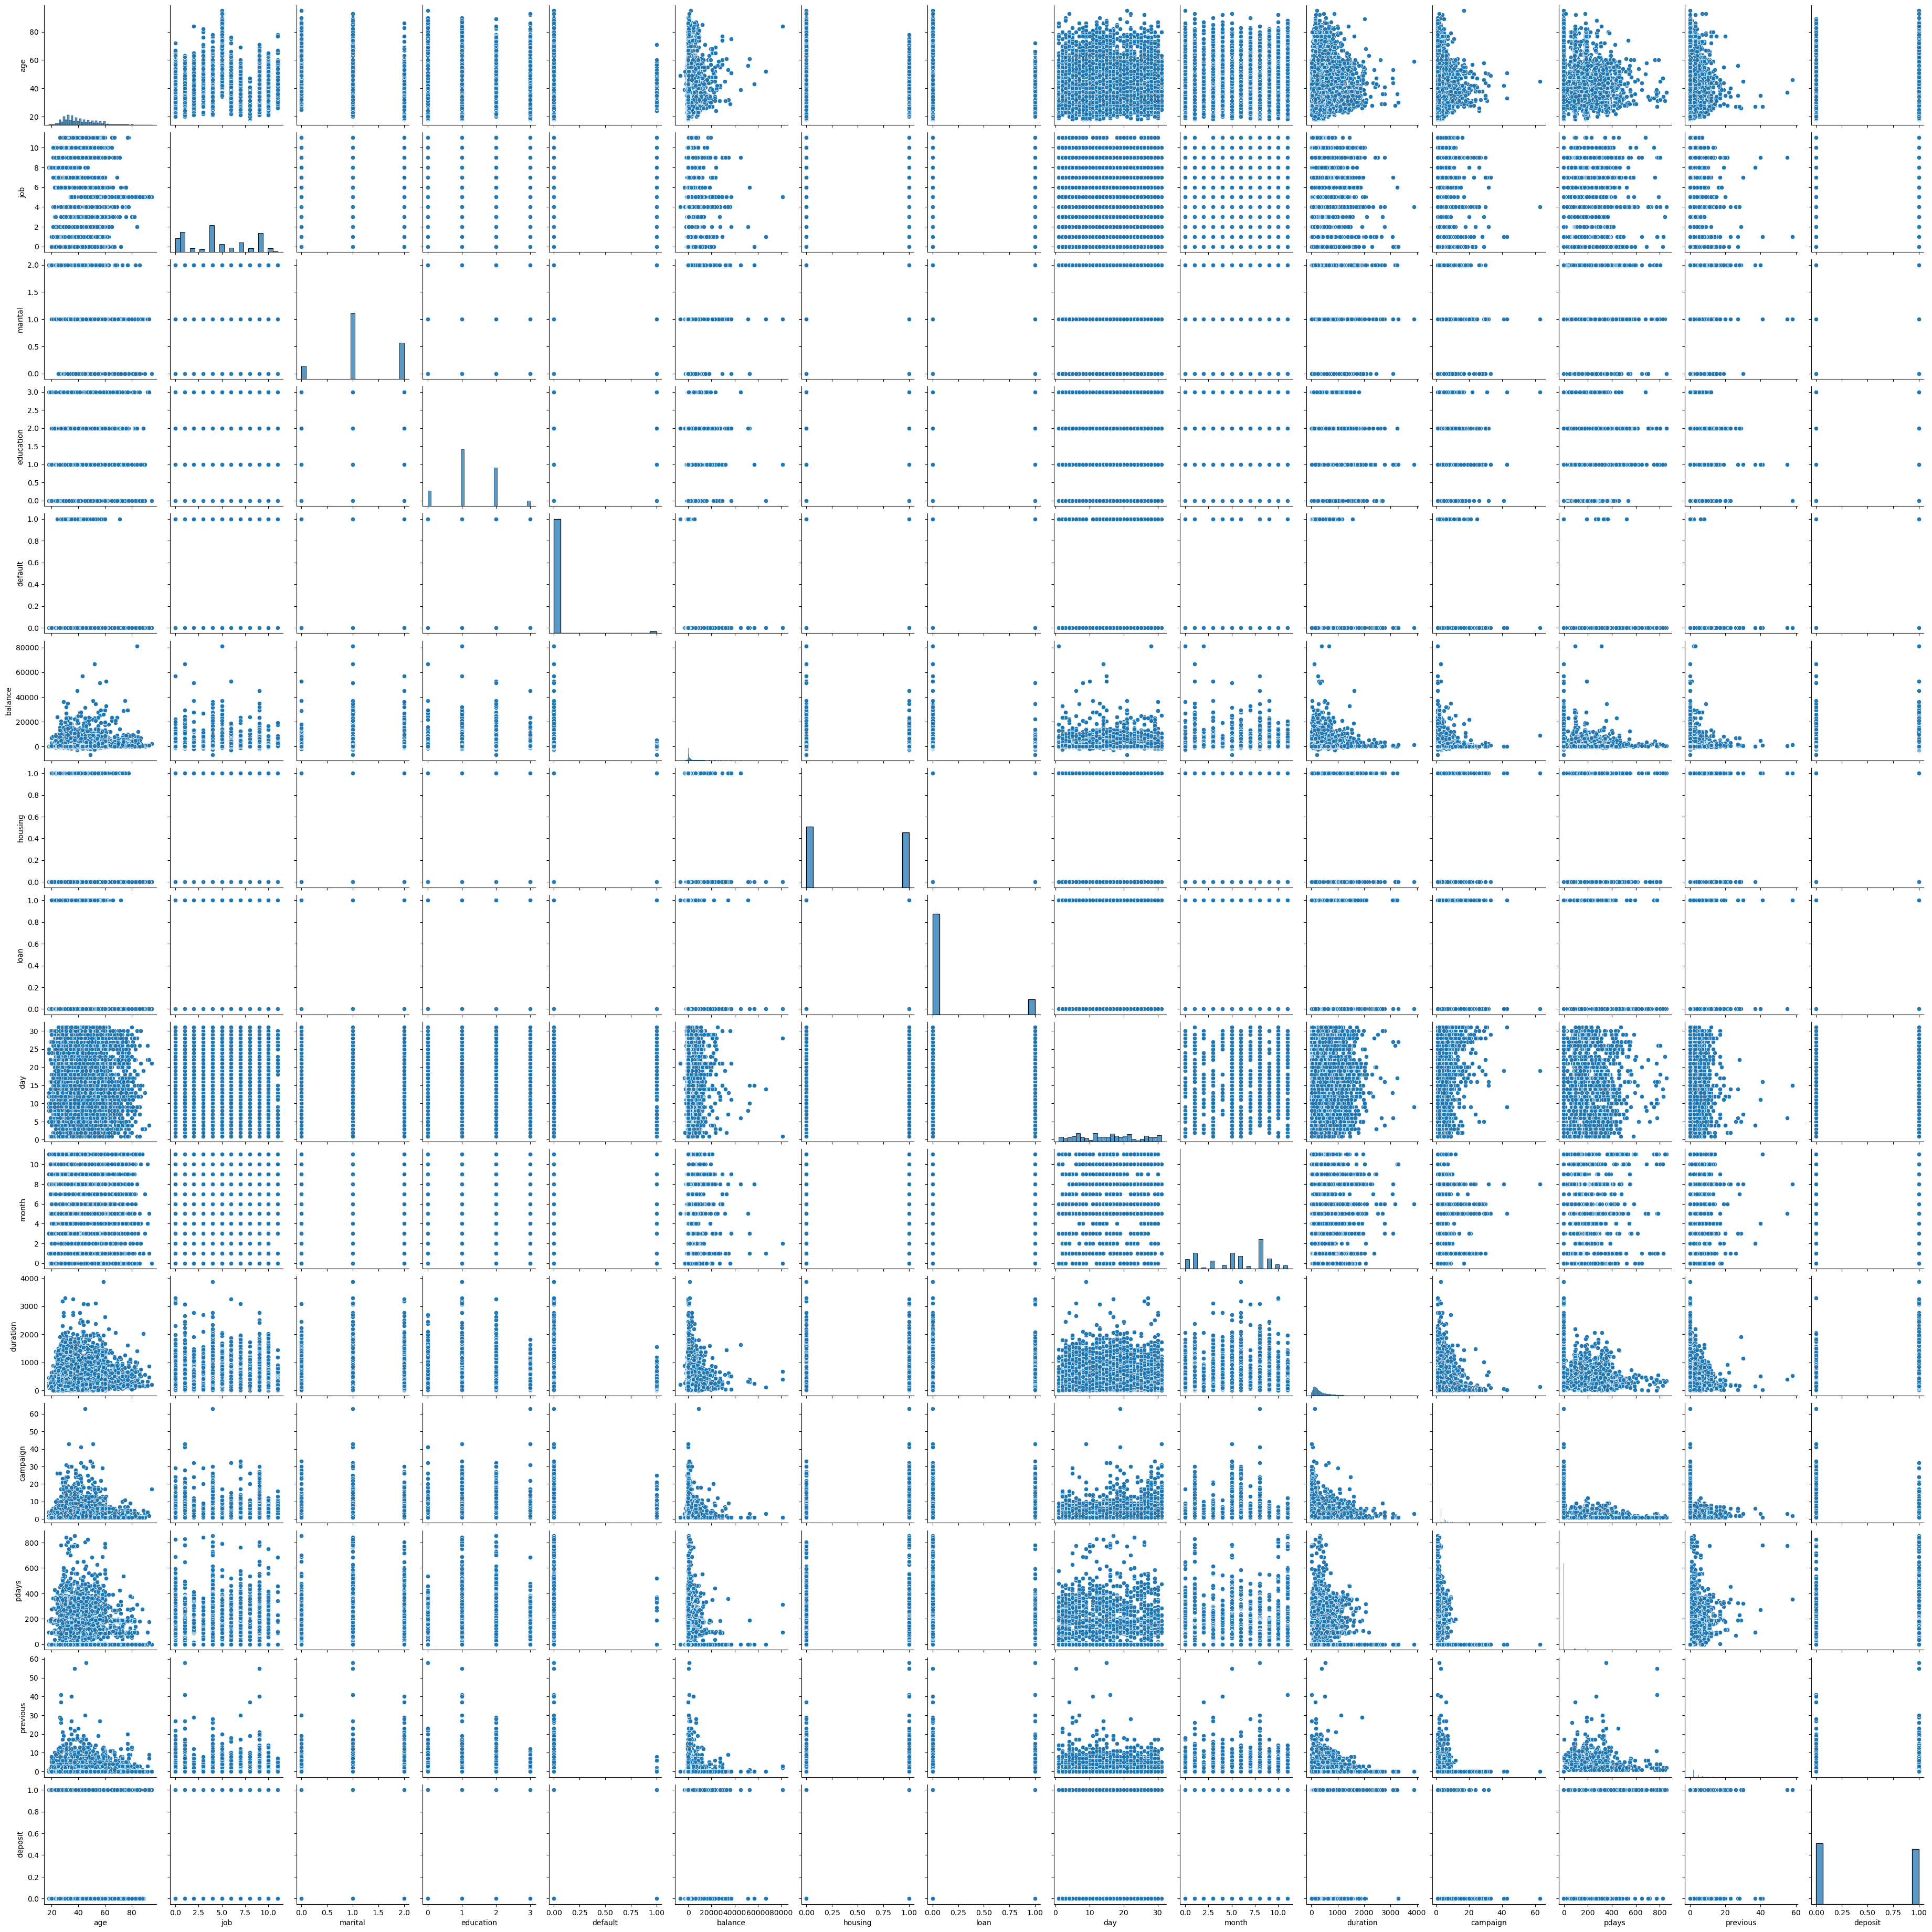

In [35]:
import seaborn as sns
fig = sns.pairplot(df)